In [18]:
# check working directory
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

current_directory = os.getcwd()
print(current_directory)

/Users/nathangibson/Downloads


In [19]:
# change working directory
new_dir_path = r'/Users/nathangibson/Downloads'
os.chdir(new_dir_path)

In [20]:
updated_dir = os.getcwd()
print(updated_dir)

/Users/nathangibson/Downloads


In [21]:
file_path = 'Week14Assignment.txt'

try:
    with open(file_path, 'r') as file:
        content = file.read()
        print(content)
except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except IOError:
    print("An error occured while reading the file.")

PatientID, Readmission, StaffSatisfaction, CleanlinessSatisfaction, FoodSatisfaction, ComfortSatisfaction, CommunicationSatisfaction
101, 1, 4, 5, 3, 4, 5
102, 0, 3, 2, 4, 2, 3
103, 1, 5, 4, 5, 4, 4
104, 0, 5, 3, 5, 4, 5
105, 1, 4, 5, 3, 4, 4
106, 1, 2, 3, 2, 3, 3
107, 0, 3, 2, 3, 4, 3
108, 0, 5, 5, 4, 5, 5
109, 1, 4, 4, 4, 4, 4
110, 0, 3, 3, 3, 4, 3
111, 1, 4, 5, 4, 4, 5
112, 0, 2, 3, 2, 3, 2
113, 1, 3, 4, 3, 4, 3
114, 1, 3, 3, 3, 2, 3
115, 0, 5, 4, 5, 5, 5
116, 1, 4, 3, 4, 4, 4
117, 0, 2, 2, 2, 3, 3
118, 0, 5, 5, 4, 4, 5
119, 1, 4, 4, 4, 4, 4
120, 0, 3, 3, 3, 4, 3
121, 1, 4, 5, 5, 4, 4
122, 1, 3, 4, 4, 4, 3
123, 0, 4, 3, 4, 3, 4
124, 0, 2, 2, 2, 3, 3
125, 1, 3, 4, 3, 4, 3
126, 0, 4, 5, 5, 5, 5
127, 1, 3, 4, 4, 4, 3
128, 0, 4, 3, 4, 3, 4
129, 0, 2, 2, 2, 3, 3
130, 1, 3, 4, 3, 4, 3


In [22]:
# average age of patients
df = pd.read_csv(file_path)

In [23]:
print(df)

    PatientID   Readmission   StaffSatisfaction   CleanlinessSatisfaction  \
0         101             1                   4                         5   
1         102             0                   3                         2   
2         103             1                   5                         4   
3         104             0                   5                         3   
4         105             1                   4                         5   
5         106             1                   2                         3   
6         107             0                   3                         2   
7         108             0                   5                         5   
8         109             1                   4                         4   
9         110             0                   3                         3   
10        111             1                   4                         5   
11        112             0                   2                         3   

In [24]:
print(df.columns)

Index(['PatientID', ' Readmission', ' StaffSatisfaction',
       ' CleanlinessSatisfaction', ' FoodSatisfaction', ' ComfortSatisfaction',
       ' CommunicationSatisfaction'],
      dtype='object')


In [25]:
# number of patients readmitted
num_pt_readmitted = (df[' Readmission'] == 1).sum()
print(f'Number of Patients Readmitted: {num_pt_readmitted}')

# average staff satisfaction
avg_staff_satisfaction = df[' StaffSatisfaction'].mean()
print(f'Average Staff Satisfaction: {avg_staff_satisfaction}')

# average cleanliness satisfaction
avg_clean_satisfaction = df[' CleanlinessSatisfaction'].mean()
print(f'Average Cleanliness Satisfaction: {avg_clean_satisfaction}')

# average food satisfaction
avg_food_satisfaction = df[' FoodSatisfaction'].mean()
print(f'Average Food Satisfaction: {avg_food_satisfaction}')

# average comfort satisfaction
avg_comfort_satisfaction = df[' ComfortSatisfaction'].mean()
print(f'Average Comfort Satisfaction: {avg_comfort_satisfaction}')

# average communication satisfaction
avg_comm_satisfaction = df[' CommunicationSatisfaction'].mean()
print(f'Average Communication Satisfaction: {avg_comm_satisfaction}')

Number of Patients Readmitted: 15
Average Staff Satisfaction: 3.5
Average Cleanliness Satisfaction: 3.6
Average Food Satisfaction: 3.533333333333333
Average Comfort Satisfaction: 3.7333333333333334
Average Communication Satisfaction: 3.7


In [30]:
df[' OverallSatisfaction'] = df[[' StaffSatisfaction',' CleanlinessSatisfaction', ' FoodSatisfaction', ' ComfortSatisfaction',' CommunicationSatisfaction']].mean(axis=1)                                

In [31]:
print(df)

    PatientID   Readmission   StaffSatisfaction   CleanlinessSatisfaction  \
0         101             1                   4                         5   
1         102             0                   3                         2   
2         103             1                   5                         4   
3         104             0                   5                         3   
4         105             1                   4                         5   
5         106             1                   2                         3   
6         107             0                   3                         2   
7         108             0                   5                         5   
8         109             1                   4                         4   
9         110             0                   3                         3   
10        111             1                   4                         5   
11        112             0                   2                         3   

In [36]:
X = df[' OverallSatisfaction'].values.reshape(-1, 1)
Y = df[' Readmission']

In [52]:
log_reg = LogisticRegression().fit(X, Y)

In [53]:
correlation_coeff = log_reg.coef_[0][0]

if correlation_coeff >= 0.7:
    print('Correlation between Overall Satisfaction Scores and Readmission: Strong Correlation')
else:
    print('Correlation between Overall Satisfaction Scores and Readmission: Weak Correlation')

Correlation between Overall Satisfaction Scores and Readmission: Weak Correlation


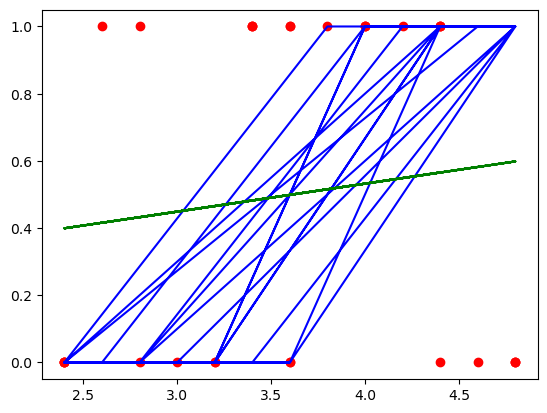

In [58]:
plt.plot(X, log_reg.predict(X), label = "Regression Line", color = 'blue')
plt.scatter(X, Y, color = 'red')
plt.plot(X, log_reg.predict_proba(X)[:, 1], label = "Pred Prob Line", color = "green")
plt.show()